In [0]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#data, output = load_breast_cancer(return_X_y = True)
data = load_breast_cancer()

x_train = data['data']
y_train = data['target']

Luego de abrir el conjunto de datos, se procede a realizar un pequeño estudio de ellos y a tratarlos para un posterior uso de ellos en el entrenamiento de distintos modelos. 

Lo primero que hay que notar es que poseemos 569 datos a partir de 30 parámetros distintos. En base a ello, sería bueno buscar alguna manera de reducir dicha cantidad de parámetros con el objetivo de disminuir el 'ruido' que ellos pueden provocar a la máquina al momento de predecir. Pero como el objetivo es familiarizarse con los algoritmos, dejaremos dicho proceso para futuras tareas.

Si bien lo anteriormente dicho se omitió, lo que sí vale la pena notar es que los datos de salida tienen una tendencia mayor a la salida 1 que la salida 0, por lo tanto, al momento de entrenar el modelo, es tentador pensar que él se va a 'familiarizar' más con las salidas 1. Esto será expuesto más adelante con el accuracy del modelo.

In [162]:
x_train.shape

(569, 30)

Text(0.2, 212, '212')

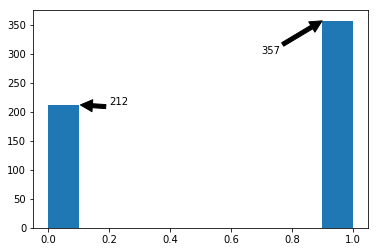

In [163]:
plt.hist(y_train)
plt.annotate('357' , xy = (0.9,357), xytext = (0.7, 300), arrowprops=dict(facecolor='black', shrink=0.005))
plt.annotate('212', xy=(0.1, 212), xytext = (0.2, 212), arrowprops=dict(facecolor='black', shrink=0.05))

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dummy_list = []
aux = list(x_train)
for k in range(x_train.shape[0]):
  aux1= list(aux[k])
  dummy_list = dummy_list + [1] + aux1
eso = np.array(dummy_list)
x_train = eso.reshape(x_train.shape[0],31)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.1, stratify = y_train)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



Decidimos añadir el *bias* al vector para simplificar las operaciones matriciales.
Una vez realizado lo anterior, procedemos a escalar los datos debido a que las unidades y medidas de ellos diferían demasiado, lo que puede alterar los resultados al momento de entrenar la máquina.

Por último, se decidió **dividir** los datos para tener una mejor precisión al momento de medir el *accuracy* de los modelos, utilizando un 10% en datos de testeo.

En lo que sigue, definimos la función *perceptrón* y, posterior a ello, aplicamos el algoritmo de entrenamiento a los datos escalados.


Para cada modelo se eligió el vector de unos de tal manera que todos los modelos tengan el mismo punto de partida. La discución de cada modelos se hará al final de la tarea con el objetivo de poder compararlos.

#PERCEPTRÓN

In [0]:
#Definiendo el perceptrón
import time


def perceptron(X,w):
  aux = np.inner(X,w)
  b= aux >0
  y = b*1
  return(y)


0.9649122807017544


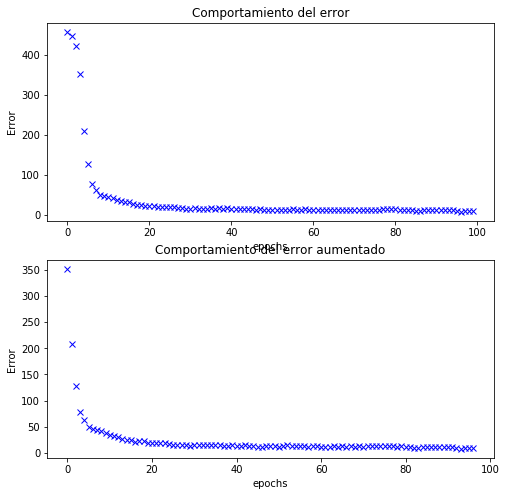

In [166]:
#Entrenando el perceptrón

w_ini = np.ones(31)
alpha = 0.001
iteraciones = 100
error = []

for i in range(iteraciones):
  error = error + [sum(abs(perceptron(x_train, w_ini)-y_train))]
  for k in range(x_train.shape[0]):
    if (perceptron(x_train[k],w_ini) == 0) & (y_train[k]==1):
      w_ini = w_ini + alpha*x_train[k]
    if (perceptron(x_train[k],w_ini)== 1) & (y_train[k]==0):
      w_ini = w_ini - alpha*x_train[k]

plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(error, 'bx')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.title('Comportamiento del error')


plt.subplot(2,1,2)
plt.plot(error[3:], 'bx')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.title('Comportamiento del error aumentado')

pred = perceptron(x_test, w_ini)
dic = { 'pred': pred, 'real': y_test}

np.nonzero(pred - y_test)

y_pred = perceptron(x_test,w_ini)
print(accuracy_score(y_pred,y_test))

#FORGETRÓN

In [0]:
#Forgetron

def forgetron(x,w,y):
      

#Parte continua

In [0]:
def sigmoid(x):
  return(1/(1+np.exp(-x)))

def loss(x,y):
  return(-y*np.log(x) - (1-y)*np.log(1-x))

def gradiente(x,w,y):
  return ((sigmoid(np.inner(x,w))-y)*x)

In [0]:
#el objetvio es minimizar la función loss, por lo tanto para entrenar el modelo debemos ir actualizando los pesos.

alpha = 0.001
w_ini = np.ones(31)
cont =0

iteraciones = 25

def sig_training(xb_train, y_train, w_ini,iteraciones, alpha):
  train=[]
  for itera in range(iteraciones):
    cont=0
    train = train + [sum(loss(sigmoid(np.inner(xb_train,w_ini)),y_train))]
    #print(loss(sigmoid(np.inner(xb_train,w_ini)),y_train))
    for k in xb_train:
      pesos = w_ini - alpha*gradiente(k,w_ini, y_train[cont])
      w_ini = pesos
      cont = cont+1
  return train, w_ini

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


0.9649122807017544


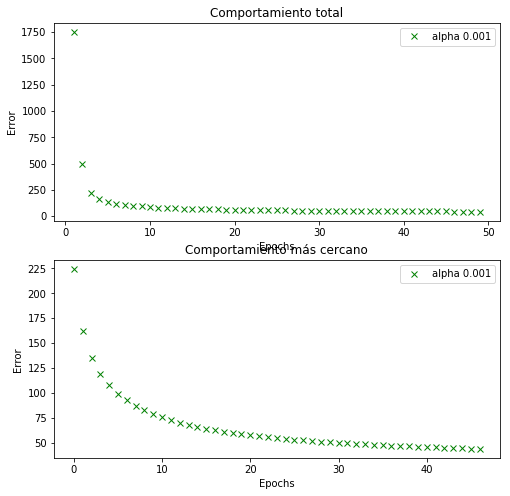

In [169]:
valores, pesos = sig_training(x_train,y_train,np.random.rand(31), 50, 0.001)

plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(valores, 'gx')
plt.legend(['alpha 0.001'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Comportamiento total')

plt.subplot(2,1,2)
plt.plot(valores[3:],'gx')
plt.legend(['alpha 0.001'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Comportamiento más cercano')
y_pred = (sigmoid(np.inner(x_test,pesos)) > 0.5)*1
y_tr = (sigmoid(np.inner(x_train,pesos))>0.5)*1

print(accuracy_score(y_pred, y_test))